# Week-13 Homework

1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator


low_memory=False
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm

In [62]:
bottle_df = pd.read_csv("bottle.csv", index_col=False, low_memory=False)
cast_df = pd.read_csv('cast.csv', index_col=False, low_memory=False)

### Data Preprocessing

In [102]:
df = pd.read_csv("bottle.csv", index_col=False, low_memory=False )

In [103]:
df.shape

(864863, 74)

In [ ]:
# we have 8,64,863 rows and 74 columns in bottle csv

In [68]:
# check the column names
print(df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [104]:
# checking datatypes
print(df.dtypes)

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment     object
Length: 74, dtype: object


In [105]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [107]:
# checking for nullvalues or missing data
df.isnull().values.any()

True

In [106]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [6]:
#  Data Cleaning

In [115]:
# finding the total percentage of missing data for each column
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Features','Total','Percent'])
df_null.Features  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.tail(50))

       Features   Total  Percent
24       O_qual  680187    78.65
25       O2Satq  647066    74.82
26       Phaeop  639592    73.95
27       ChlorA  639591    73.95
28      R_PHAEO  639588    73.95
29       R_CHLA  639587    73.95
30        NO3uM  527460    60.99
31        R_NO3  527452    60.99
32        NO2uM  527287    60.97
33        R_NO2  527279    60.97
34       SiO3uM  510772    59.06
35       R_SIO3  510764    59.06
36        PO4uM  451546    52.21
37        R_PO4  451538    52.21
38         PO4q  413077    47.76
39       SiO3qu  353997    40.93
40         NO2q  335389    38.78
41         NO3q  334930    38.73
42       Chlqua  225697    26.10
43       Phaqua  225693    26.10
44  Oxy_µmol/Kg  203595    23.54
45        O2Sat  203589    23.54
46      R_O2Sat  198415    22.94
47       P_qual  191108    22.10
48       O2ml_L  168662    19.50
49         R_O2  168662    19.50
50         NH3q   56564     6.54
51      R_SIGMA   52856     6.11
52        R_SVA   52771     6.10
53       S

In [116]:
# Drop attributes with more than 30% data missing

for i in df_null.Features[df_null['Percent'] > 30]:
    df = df.drop([i], axis=1)
#     print(df.shape,i)

In [119]:
#Fill remaining NULL values with mean 
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mean(), inplace=True)
#         print('filled',i)

In [120]:
#Re-check NULL Percentages
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Features','Total','Percent'])
df_null.Features  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head())

  Features  Total  Percent
0  Cst_Cnt      0      0.0
1  Btl_Cnt      0      0.0
2  R_O2Sat      0      0.0
3     R_O2      0      0.0
4  R_DYNHT      0      0.0


In [121]:
# check for duplicate values
print('COUNT OF DUPLICATES:  {}'.format(df.duplicated().sum()))

COUNT OF DUPLICATES:  0


2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature

In [12]:
df.dtypes.head()

Cst_Cnt      int64
Btl_Cnt      int64
Sta_ID      object
Depth_ID    object
Depthm       int64
dtype: object

In [13]:
cat_data = df.select_dtypes("object") #categorical data
num_data = df.select_dtypes("number") #numerical data

In [14]:
null_count=num_data.isnull().sum(axis=0)
x=null_count.reset_index()

In [15]:
num_data.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999345,-0.162222,0.091209,-0.157695,-0.137306,-0.100142,0.068282,0.400713,-0.164697,...,-0.002795,-0.002955,-0.162220,0.091217,0.089377,-0.157281,-0.150139,0.148983,-0.067114,-0.161961
Btl_Cnt,0.999345,1.000000,-0.161617,0.092029,-0.155213,-0.136709,-0.100828,0.063216,0.399631,-0.169106,...,-0.002666,-0.002841,-0.161614,0.092037,0.090212,-0.154805,-0.149557,0.148483,-0.067493,-0.161348
Depthm,-0.162222,-0.161617,1.000000,-0.675837,0.529288,0.548833,0.082316,0.019953,0.015999,0.009856,...,0.001804,0.001944,1.000000,-0.675837,-0.647452,0.527977,0.570079,-0.631674,0.798042,0.999994
T_degC,0.091209,0.092029,-0.675837,1.000000,-0.474769,-0.795829,-0.065709,-0.040445,-0.043133,0.001108,...,-0.003950,-0.004095,-0.675835,1.000000,0.976312,-0.473570,-0.828833,0.931972,-0.721185,-0.674507
Salnty,-0.157695,-0.155213,0.529288,-0.474769,1.000000,0.545147,0.060568,-0.017962,-0.096793,0.018628,...,0.003679,0.003865,0.529287,-0.474770,-0.487599,0.997472,0.569549,-0.652126,0.662413,0.528064
STheta,-0.137306,-0.136709,0.548833,-0.795829,0.545147,1.000000,0.061734,0.023830,0.035440,0.010064,...,0.004077,0.004235,0.548834,-0.795830,-0.816558,0.543799,0.956633,-0.861020,0.594034,0.547659
RecInd,-0.100142,-0.100828,0.082316,-0.065709,0.060568,0.061734,1.000000,0.041380,0.350283,0.014564,...,0.002577,0.002577,0.082317,-0.065709,-0.063848,0.060502,0.058483,-0.064013,0.071293,0.082183
T_prec,0.068282,0.063216,0.019953,-0.040445,-0.017962,0.023830,0.041380,1.000000,0.094377,0.011404,...,0.000326,0.000326,0.019953,-0.040446,-0.044703,-0.017906,0.023467,-0.027705,0.017038,0.019975
S_prec,0.400713,0.399631,0.015999,-0.043133,-0.096793,0.035440,0.350283,0.094377,1.000000,-0.060094,...,-0.001720,-0.001720,0.016000,-0.043130,-0.043529,-0.096457,0.030759,-0.025205,-0.012089,0.016103
NH3q,-0.164697,-0.169106,0.009856,0.001108,0.018628,0.010064,0.014564,0.011404,-0.060094,1.000000,...,-0.000283,-0.000283,0.009856,0.001097,0.001138,0.018561,0.009702,-0.009533,-0.014864,0.009753


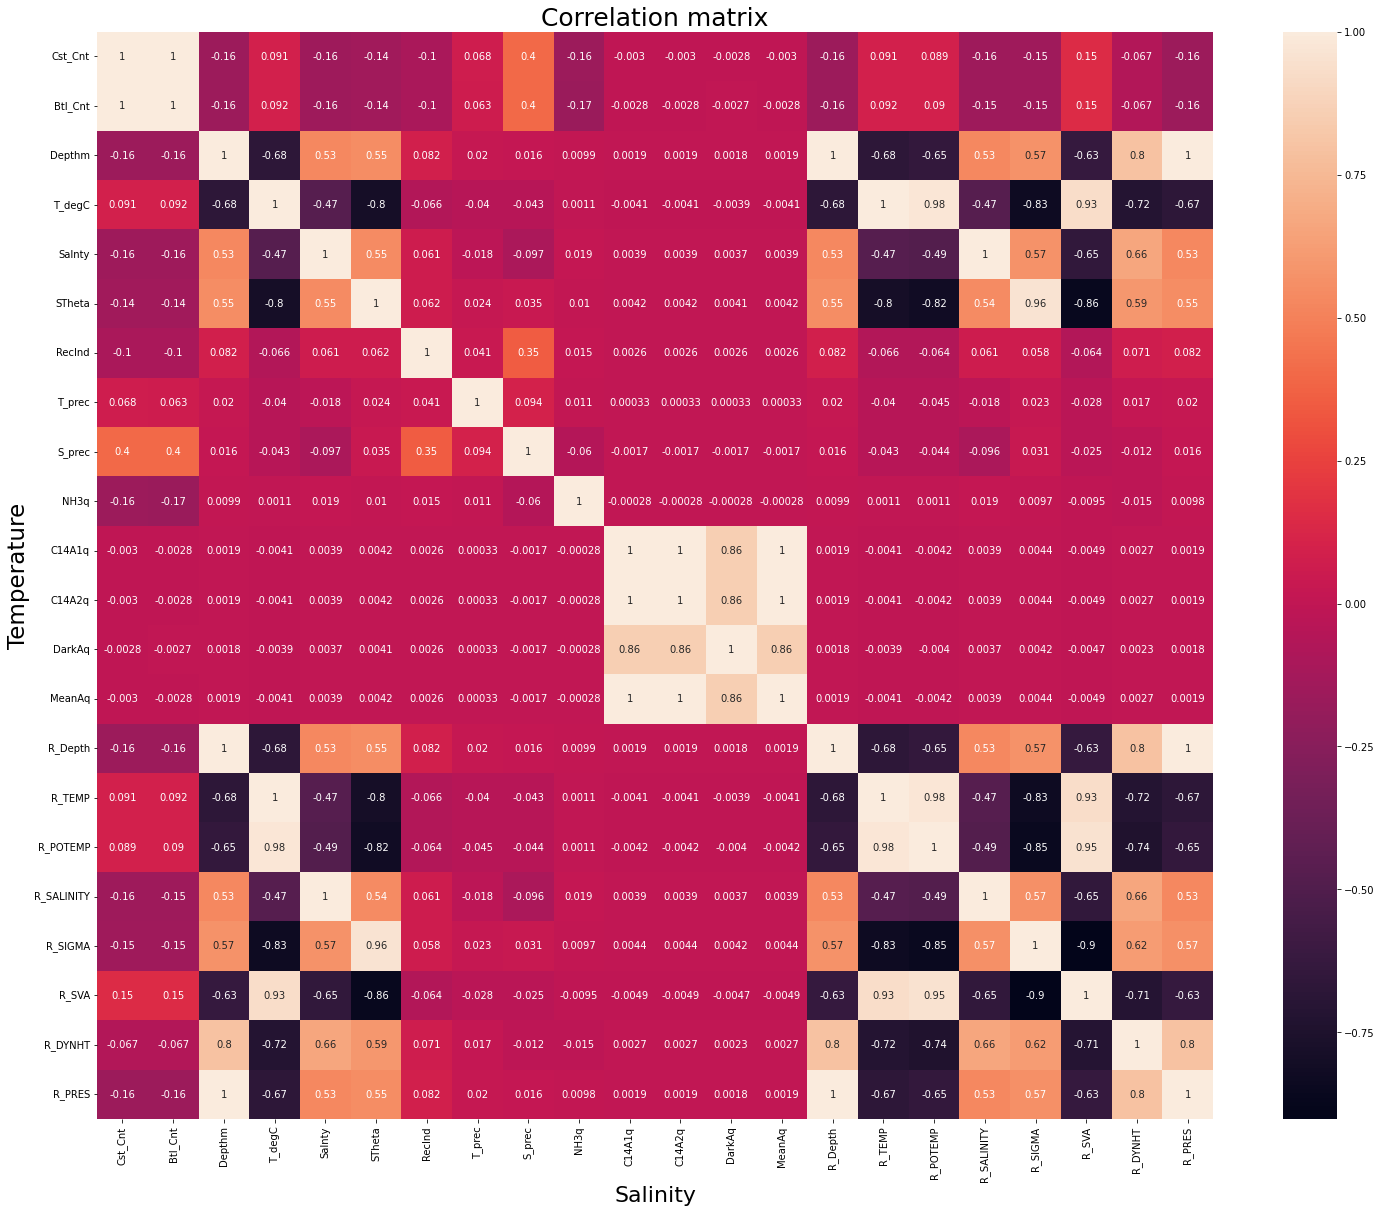

In [16]:
correlation_mat = num_data.corr()
fig_dims = (25, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.title("Correlation matrix", size = 25)
plt.xlabel("Salinity", size = 22)
plt.ylabel("Temperature", size = 23)
plt.show()

Temperature has a strong negative correlation with features like Potential Density of Water(STheta) i.e,-0.795829, 
Depth in meters(Depthm) i.e,-0.675837, Reported Depth in Meters(R_Depth)i.e,-0.675835, Reported Dynamic Height(R_DYNHT)i.e,-0.798042
Pressure in decibars(R_PRES)i.e,-0.674507

Temperature has a very strong positive correlation with Reported Specific Volume Anomaly(R_SVA) which is 0.931972, 
Reported Potential Temperature(R_POTEMP) and Reported Temperature(R_TEMP) which is 0.976312 and 1.000000 respectively.

moderate correlation with salinity(salnty)i.e,-0.474769, Reported Salinity(R_SALINITY)i.e,-0.473570

very weak correlation with Ammonium Quality Code(NH3q)

3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity

In [122]:
bottle_df = pd.read_csv("bottle.csv", index_col=False, low_memory=False )

In [124]:
# Extract 2 columns 'T_degC','Salnty' for better understanding
df_temp_sal = bottle_df[['T_degC','Salnty']]

# rename columns T_degC as Temperatures and Salnty as Salinity
df_temp_sal.columns = ['Temperature', 'Salinity']

In [126]:
# see how many null values we have

df_temp_sal.isnull().sum()

Temperature    10963
Salinity       47354
dtype: int64

In [127]:
# Drop NaN or missing input numbers

# df.fillna(method='ffill', inplace=True)
df_noNaN = df_temp_sal.dropna()
# df.value_counts()
df_noNaN.isnull().sum()

Temperature    0
Salinity       0
dtype: int64

In [128]:
# Features Salinity and Temperature are chosen

X = np.array(df_noNaN['Salinity']).reshape(-1, 1).astype(float)
y = np.array(df_noNaN['Temperature']).reshape(-1, 1).astype(float)

In [129]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [130]:
# import linear regression from sklearn.linear model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # create the regressor: lin_reg
lin_reg.fit(X_train, y_train)      #fit the model to the data

LinearRegression()

In [131]:
y_pred = lin_reg.predict(X_test)      # Predict Linear Model
accuracy_score = lin_reg.score(X_test, y_test)   # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))
print(y_pred)

Linear Regression Model Accuracy Score: 25.4%
[[12.94837851]
 [16.28180909]
 [10.03162676]
 ...
 [13.51783957]
 [11.79093734]
 [ 9.65198605]]


In [132]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.254


4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [133]:
#Compute and print R2 and RMSE
from sklearn.metrics import mean_squared_error,r2_score

print("R2 value: " +"{:.3}".format(r2_score(y_test, y_pred)))
print("Mean Squared Error: " +"{:.3}".format(mean_squared_error(y_test, y_pred)))

R2 value: 0.254
Mean Squared Error: 13.3


Generally, we have our R-Squared value between +1 to -1 and its better if we have our R-squre less and mean squre error bit high.
Mean square error minimize the loss so its good if we have our mean square error as small as possible.

5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

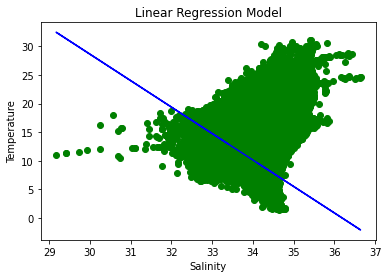

In [134]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue')
plt.title("Linear Regression Model")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

As Salinity increasing Temperature is decreasing.

6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Polynomial regression is a special form of linear regression and improves the model performance by adding extra features
obtained by raising each of the original feature to the power. In some cases, linear regression fails to best fit when we 
have a non-linear data, then we use Polynomial Regression where the points in data are captured in a curvilinear fasion, and
identifies the relationship between independent and dependent variables.

The 'degree' of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two 
new variables for each input variable and the creation of new input features are based on existing features.

7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)
print(polynomial_predict)

[[15.03750852]
 [11.32409413]
 [ 7.69953874]
 ...
 [ 8.35230983]
 [11.95911561]
 [13.14593178]]


In [138]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 3.3
R2 Score for Test set: 0.37


8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

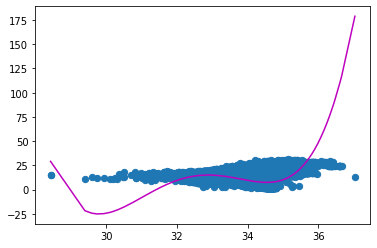

In [139]:
plt.scatter(X_train, y_train, s=40)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train, polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

From the above plot using polynomial regression, the model performance is some what better as our root mean square error 
is less i.e, 3.3 when compared with linear regression which is having 13.3 value 
and the R-squared value is more i.e,0.37 when ompared to linear regression model which is having 0.254.

### DataCamp Screenshots

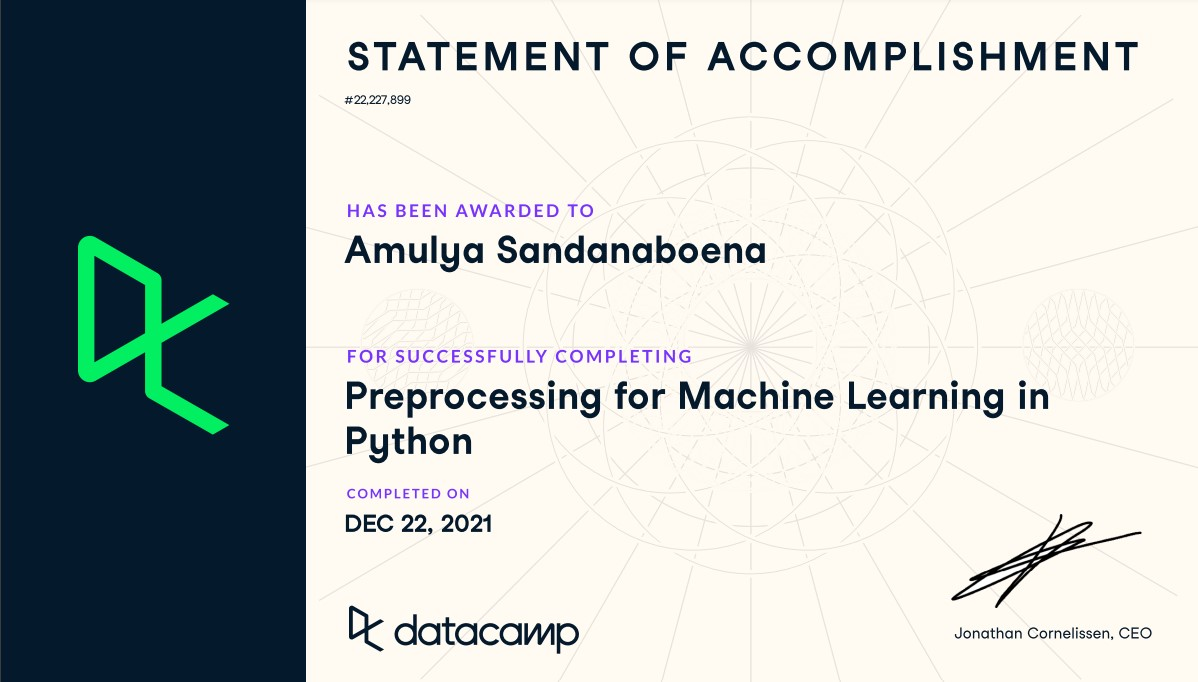

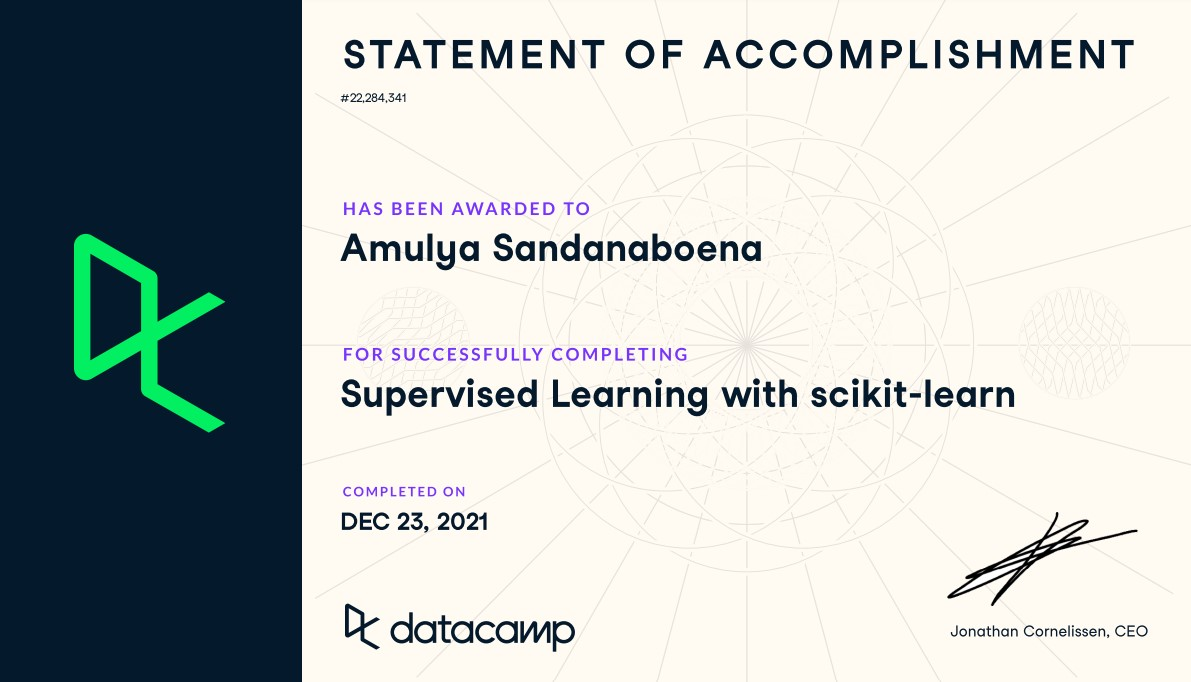